In [ ]:
#Analysis of Nigerian housing data by desireability of location, pricing and spacing 

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

In [201]:
df = pd.read_csv('data/nigeria_houses_data.csv')
df.info()
df.describe()
df = df.head(40)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0


In [202]:
df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [203]:
df.fillna(value=0,inplace=True)

In [204]:
df['price'] = df['price'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)

<Axes: xlabel='bedrooms'>

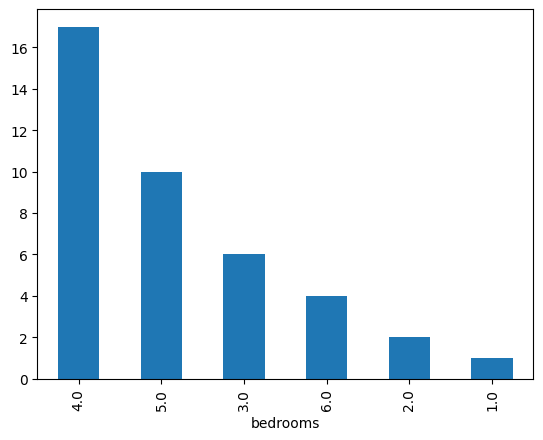

In [205]:
#univariate distribution of price, bedrooms, bathrooms, parking_space
df['price'].hist(bins=50)
df['bedrooms'].value_counts().plot(kind='bar')

<Axes: xlabel='bathrooms', ylabel='price'>

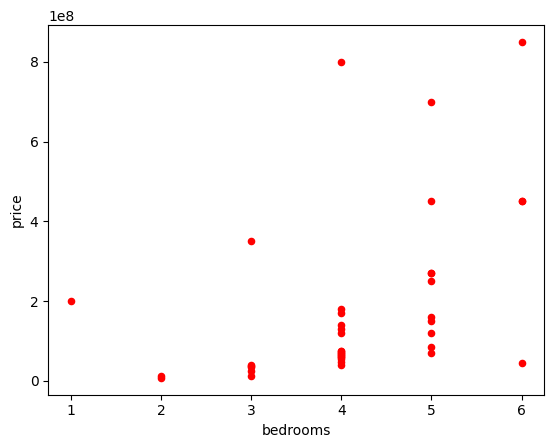

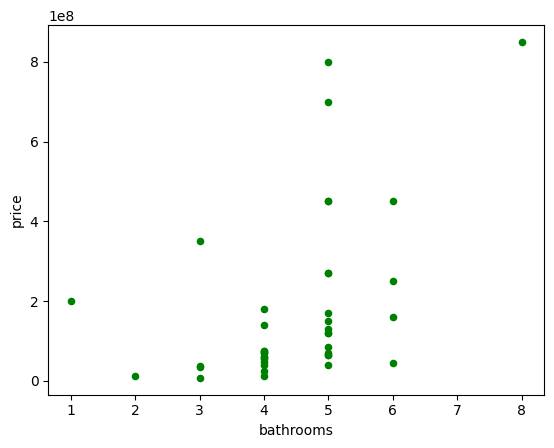

In [206]:
#use bivariate analysis to check for relationship between price,bedrooms, etc 
df.plot.scatter(x='bedrooms',y='price', color='red')
df.plot.scatter(x='bathrooms',y='price', color='green')

<Axes: xlabel='state'>

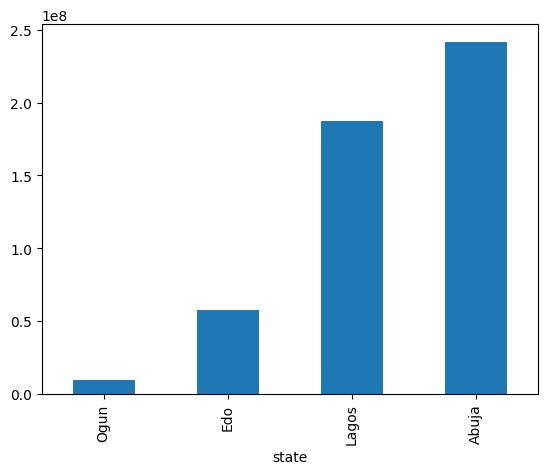

In [ ]:
#find relationship between town, state and price
df.groupby('state')['price'].mean().sort_values().plot(kind='bar')

In [209]:
df['price_per_bedroom'] = df['price'] /df['bedrooms']

In [210]:
df = pd.get_dummies(df, columns=['state'])

In [211]:
#use label encoding to transform categorical labels into numerical values 
#and one-hot encoding convert each unique category into a separate binary column respectively

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numeric using Label Encoding
for col in non_numeric_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

<Axes: >

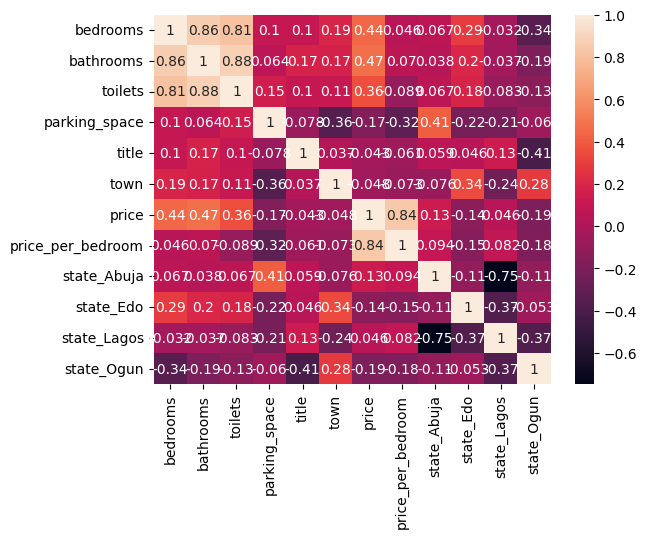

In [212]:
#correlation analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

In [170]:
#Modeling by train and test split
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [171]:
#selection of linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [172]:
#model eveluation using R2,RMSE and MAE
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)